# Importing necessory libraries

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import load_iris
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from fcmeans import FCM
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt

# Load IRIS Data

In [2]:
iris=load_iris()
X=iris.data
y=iris.target

# Dimensionality Reduction for Scatter Plot

In [3]:
#We are using PCA to reduce dimensions of data and we are reducing it to 2 from 4.
pca = sklearnPCA(n_components=2) #2-dimensional PCA
pca_2d = pd.DataFrame(pca.fit_transform(X))

# Scatter Plot for Actual clusters

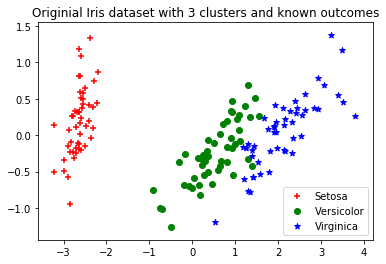

In [4]:
for i in range(0, pca_2d.shape[0]):
    if iris.target[i] == 0:
        c1 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='r',marker='+')
    elif iris.target[i] == 1:
        c2 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='g',marker='o')
    elif iris.target[i] == 2:
        c3 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='b',marker='*')
plt.legend([c1, c2, c3], ['Setosa', 'Versicolor','Virginica'])
plt.title('Originial Iris dataset with 3 clusters and known outcomes')
plt.show()

# Fuzzy C-Means Implementation

### Weight matrix initalisation

In [5]:
k=3
weights=[]
for i in range(len(X)):
    remain=1
    t=[]
    for j in range(k-1):
        t.append(random.uniform(0,remain))
        remain-=t[j]
    t.append(remain)
    weights.append(t)

### Clustering

In [6]:
centroids=[[0 for _ in range(len(X[0]))] for _ in range(k)]
m=2
tolerance=0.4

while True:
    
    #computing centroids for clusters
    for i in range(k):
        t=[]
        for j in range(len(X[0])):
            sn=0
            sd=0
            for x in range(len(X)):
                sn+=X[x][j]*(weights[x][i]**m)
                sd+=(weights[x][i]**m)
            t.append(sn/sd)
        centroids[i]=t
    
    # updating the weight matrix
    new_weights=[[0 for _ in range(k)] for _ in range(len(X))]
    p=1/(m-1)
    for da in range(len(X)):
        d=[]
        for j in centroids:
            d.append(np.linalg.norm(X[da]-j))
        for l in range(k):
            t=0
            for n in range(k):
                t+=(d[l]/d[n])**2
            new_weights[da][l]=(1/(t**p))
    
    # checking if change in weight matrix is less than the tolerance value
    diff=np.absolute(np.subtract(weights,new_weights))
    count=0
    for l in diff:
        for n in l:
            if n>=tolerance:
                count+=1
    if count==0:
        break
    weights=new_weights
    
# Getting cluster labels    
preds=[]
for i in weights:
    max_val, idx = max((val, idx) for (idx, val) in enumerate(i))
    preds.append(idx)

### Performance

In [8]:
result=precision_recall_fscore_support(preds,y, average='weighted')
precision,recall,fscore=result[0],result[1],result[2]
accuracy=accuracy_score(preds, y)

print('Accuracy :',accuracy)
print('Precision :',precision)
print('Recall :',recall)
print('F1 Score :',fscore)

Accuracy : 0.8066666666666666
Precision : 0.9044
Recall : 0.8066666666666666
F1 Score : 0.8263246149848222


# Built-in Fuzzy C-Means 

In [9]:
#initialise Fuzzy c-means function
fcm = FCM(n_clusters=3)

#fitting data
fcm.fit(X)

# getting cluster centers and labels
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

### Performance

In [10]:
result=precision_recall_fscore_support(fcm_labels,y, average='weighted')
precision1,recall1,fscore1=result[0],result[1],result[2]
accuracy1=accuracy_score(fcm_labels, y)

print('Accuracy :',accuracy1)
print('Precision :',precision1)
print('Recall :',recall1)
print('F1 Score :',fscore1)

Accuracy : 0.31333333333333335
Precision : 0.376
Recall : 0.31333333333333335
F1 Score : 0.3418181818181818


# Scatter Plot for Manual implementation

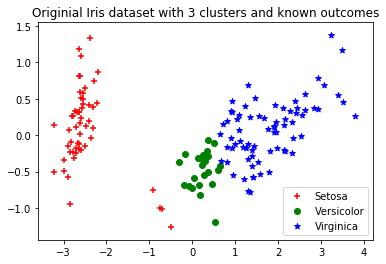

In [11]:
for i in range(0, pca_2d.shape[0]):
    if preds[i] == 0:
        c1 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='r',marker='+')
    elif preds[i] == 1:
        c2 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='g',marker='o')
    elif preds[i] == 2:
        c3 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='b',marker='*')
plt.legend([c1, c2, c3], ['Setosa', 'Versicolor','Virginica'])
plt.title('Originial Iris dataset with 3 clusters and known outcomes')
plt.show()

# Scatter Plot for Built-in Fuzzy c-means

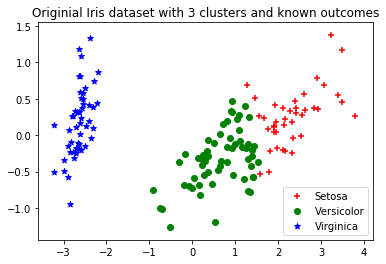

In [12]:
for i in range(0, pca_2d.shape[0]):
    if fcm_labels[i] == 0:
        c1 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='r',marker='+')
    elif fcm_labels[i] == 1:
        c2 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='g',marker='o')
    elif fcm_labels[i] == 2:
        c3 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='b',marker='*')
plt.legend([c1, c2, c3], ['Setosa', 'Versicolor','Virginica'])
plt.title('Originial Iris dataset with 3 clusters and known outcomes')
plt.show()

# Observations

1. Manual implemenation shows better performance than buil-in on the basis on performance metrics.
2. Cluster formation is better in built-in method.
3. Though cluster label mismatch is there for built-in, but clusters are almost similar to original ones.